# Minnesota Crime Data
----
- Crime data by police dept for each year: 2012-2014
- Crime data by neighborhood in Mpls for years 2017-2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Mpls neighborhood crime data
mpls_crime = pd.read_csv("Resources/Minneapolis_NEIGHBORHOOD_CRIME_STATS.csv")

# MN crime data by jurisdiction (2014, 2013, 2012)
mn_crime_2014 = pd.read_csv("Resources/MN_crime_data_2014.csv", header=8, skipfooter=19, engine='python')
mn_crime_2013 = pd.read_csv("Resources/MN_crime_data_2013.csv", header=8, skipfooter=19, engine='python')
mn_crime_2012 = pd.read_csv("Resources/MN_crime_data_2012.csv", header=8, skipfooter=19, engine='python')

### Pairing down the data for crime by police dept in mn for each year

In [2]:
# Scale down number of columns
columns_of_interest = \
['Agency',
 'Population',
 'Real Violent Crime Total',
 'Real Violent Crime Rate',
 'Property crime total',
 'Property crime rate',
 'Crime Total',
 'Crime Rate']

new_column_names = \
[
    'Agency',
    'Population',
    'VC_Total',
    'VC_Rate',
    'PC_Total',
    'PC_Rate',
    'Crime_Total',
    'Crime_Rate'    
]

In [3]:
# Crime data for 2014

# get violent crime total, then violent crime rate
mn_crime_2014['Real Violent Crime Total'] = mn_crime_2014['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2014['Revised rape /2'] + \
                                            mn_crime_2014['Robbery'] + \
                                            mn_crime_2014['Aggravated assault']

mn_crime_2014['Real Violent Crime Rate'] = mn_crime_2014['Real Violent Crime Total'] / \
                                           (mn_crime_2014['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2014['Crime Total'] = mn_crime_2014['Property crime total'] + \
                                   mn_crime_2014['Real Violent Crime Total']

mn_crime_2014['Crime Rate'] = mn_crime_2014['Crime Total'] / \
                              (mn_crime_2014['Population'] / 100000)

crime_rates_2014 = mn_crime_2014[columns_of_interest]

# Rename columns
crime_rates_2014.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
crime_rates_2014.to_csv("Resources/2014_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [4]:
# DO THE SAME FOR 2013

# get violent crime total, then violent crime rate
mn_crime_2013['Real Violent Crime Total'] = mn_crime_2013['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2013['Revised rape /2'] + \
                                            mn_crime_2013['Robbery'] + \
                                            mn_crime_2013['Aggravated assault']

mn_crime_2013['Real Violent Crime Rate'] = mn_crime_2013['Real Violent Crime Total'] / \
                                           (mn_crime_2013['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2013['Crime Total'] = mn_crime_2013['Property crime total'] + \
                                   mn_crime_2013['Real Violent Crime Total']

mn_crime_2013['Crime Rate'] = mn_crime_2013['Crime Total'] / \
                              (mn_crime_2013['Population'] / 100000)

crime_rates_2013 = mn_crime_2013[columns_of_interest]

# Rename columns
crime_rates_2013.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
crime_rates_2013.to_csv("Resources/2013_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [5]:
# DO THE SAME FOR 2012

# get violent crime total, then violent crime rate
mn_crime_2012['Real Violent Crime Total'] = mn_crime_2012['Murder and nonnegligent Manslaughter'] + \
                                            mn_crime_2012['Revised rape /2'] + \
                                            mn_crime_2012['Robbery'] + \
                                            mn_crime_2012['Aggravated assault']

mn_crime_2012['Real Violent Crime Rate'] = mn_crime_2012['Real Violent Crime Total'] / \
                                           (mn_crime_2012['Population'] / 100000)

# get total crimes and total crime rate
mn_crime_2012['Crime Total'] = mn_crime_2012['Property crime total'] + \
                                   mn_crime_2012['Real Violent Crime Total']

mn_crime_2012['Crime Rate'] = mn_crime_2012['Crime Total'] / \
                              (mn_crime_2012['Population'] / 100000)

crime_rates_2012 = mn_crime_2012[columns_of_interest]

# Rename columns
crime_rates_2012.columns = new_column_names

# Export smaller dataframe with real violent crime rate included
crime_rates_2012.to_csv("Resources/2012_MN_Crime_Rates_OUTPUT_FILE.csv", index=False)

In [6]:
# Drop rows with NaN values
## Each county's sherrif's office gets dropped
### It's okay because the city police depts are more relevant

crime_rates_2014.dropna(how='any', inplace=True)
crime_rates_2013.dropna(how='any', inplace=True)

# 2012 data doesn't contain violent crime data
crime_rates_2012 = crime_rates_2012.loc[crime_rates_2012['Agency'].str.contains('Sheriff') == False]

C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Jackmarius\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Create dataframe storing avg crime rates, populations for each department

avg_crime_rates = crime_rates_2014.filter(['Agency'], axis=1)

avg_columns = ['Avg_Population', 'Avg_VC', 'Avg_PC', 'Avg_Crime_Rate']

crime_rates_columns = ['Population', 'VC_Rate', 'PC_Rate', 'Crime_Rate']

# tracking index to iterate through avg_columns
index=0

for column in crime_rates_columns:
    
    avg_crime_rates[avg_columns[index]] = (crime_rates_2014[column] + crime_rates_2013[column]) / 2
    
    index += 1
    
avg_crime_rates.reset_index(drop=True, inplace=True)


In [14]:
# Remove extraneous substrings from 'Agency' names

agency_list = []
substrings = [' Police Dept', 'City Of ', ' Safety Dept',
              ' Dept Public Safety', ' City', ' Dept Of Public Safety']


for name in avg_crime_rates.Agency:

    for sub in substrings:
        
        if sub in name:
            
            name = str.replace(name, sub, '')
        
    agency_list.append(name)

# update agency column
avg_crime_rates.Agency = agency_list

# Output as CSV
avg_crime_rates.to_csv("Resources/2013-2014_MN_Crime_OUTPUT_FILE.csv", index=False)

,Agency,Avg_Population,Avg_VC,Avg_PC,Avg_Crime_Rate
0,Albert Lea,17850.0,179.255865,2366.80,2546.074071
1,Alexandria,11714.5,260.356176,3423.15,3683.505883
2,Anoka,17282.5,257.454643,3266.35,3523.768295
3,Apple Valley,50367.0,90.351806,2189.20,2279.544961
4,Austin,24794.5,256.117113,2699.80,2955.924554
5,Bemidji,14159.0,376.409335,8202.55,8578.972759
6,Big Lake,10322.0,145.370403,1210.55,1355.944446
7,Blaine,60640.0,76.725490,2932.20,3008.931827
8,Bloomington,87110.0,163.576203,3722.35,3885.911000
9,Brainerd,13477.5,538.083636,5211.95,5750.076224


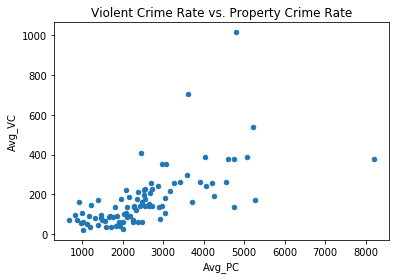

In [15]:
avg_crime_rates.plot(x='Avg_PC', y='Avg_VC', kind='scatter', title='Violent Crime Rate vs. Property Crime Rate')

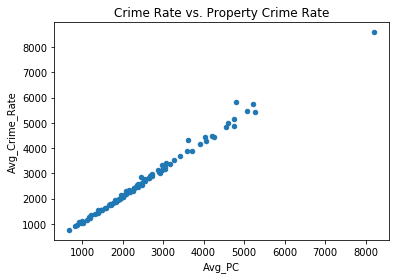

In [16]:
avg_crime_rates.plot(x='Avg_PC', y='Avg_Crime_Rate', kind='scatter', title='Crime Rate vs. Property Crime Rate')

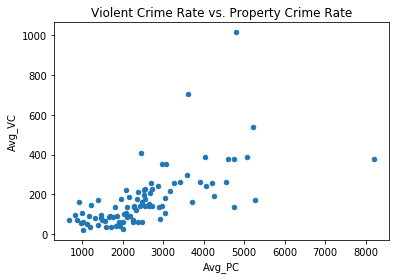

In [17]:
avg_crime_rates.plot(x='Avg_PC', y='Avg_VC', kind='scatter', title='Violent Crime Rate vs. Property Crime Rate')

### Add in school data

In [31]:
# Read in school data
school_data = pd.read_excel("Resources/CleanedGradFile2018.xlsx")
# Drop extra index row
school_data.drop(['Unnamed: 0'], axis=1, inplace=True)

school_data

,District Number,School Number,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,1,1,AITKIN SECONDARY SCHOOL,All Students,Graduate,90.80,87.0,306 2nd St NW,Aitkin,MN,56431
1,1,307,BASIC SKILLS-4,All Students,Graduate,77.36,106.0,1250 W Broadway Ave,Minneapolis,MN,55411
2,1,346,800 W BROADWAY,All Students,Graduate,3.57,28.0,1250 West Broadway,Minneapolis,MN,55411
3,1,347,FAIR SENIOR HIGH,All Students,Graduate,79.37,63.0,10 South 10th Street,Minneapolis,MN,55403
4,1,348,MERC,All Students,Graduate,3.70,27.0,2539 Pleasant Ave,Minneapolis,MN,55404-4213
5,1,349,LORING-NICOLLET HIGH,All Students,Graduate,37.50,24.0,1925 Nicollet Ave S,Minneapolis,MN,55403
6,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
7,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
8,1,352,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
9,1,353,LONGFELLOW ALTERNATIVE,All Students,Graduate,12.90,31.0,3017 E 31st St,Minneapolis,MN,55406


In [40]:
crime_df = avg_crime_rates.copy()

crime_df_columns = \
[
    'City',
    'Population',
    'Violent Crime Rate',
    'Property Crime Rate',
    'Overall Crime Rate'
]

crime_df.columns = crime_df_columns

crime_rates_df = crime_df[['City', 'Violent Crime Rate', 'Property Crime Rate', 'Overall Crime Rate']]

In [114]:
school_crime = pd.merge(crime_rates_df, school_data,
                       how='left', left_on='City', right_on='Physical City')

school_crime.dropna(how='any', inplace=True)
school_crime

,City,Violent Crime Rate,Property Crime Rate,Overall Crime Rate,District Number,School Number,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
0,Albert Lea,179.255865,2366.80,2546.074071,241.0,310.0,ALBERT LEA SENIOR HIGH,All Students,Graduate,86.22,225.0,2000 Tiger Ln,Albert Lea,MN,56007-6307
1,Albert Lea,179.255865,2366.80,2546.074071,241.0,350.0,ALBERT LEA AREA LEARNING CENTER,All Students,Graduate,52.70,74.0,2200 Riverland Drive,Albert Lea,MN,56007
2,Alexandria,260.356176,3423.15,3683.505883,206.0,320.0,ALEXANDRIA AREA HIGH SCHOOL,All Students,Graduate,88.03,309.0,4300 Pioneer Road SE,Alexandria,MN,56308
3,Alexandria,260.356176,3423.15,3683.505883,6014.0,20.0,RUNESTONE REGIONAL LEARNING CENTER,All Students,Graduate,38.64,44.0,700 Northside Dr NE,Alexandria,MN,56308-5080
4,Alexandria,260.356176,3423.15,3683.505883,6014.0,20.0,RUNESTONE REGIONAL LEARNING CENTER,All Students,Graduate,38.64,44.0,700 Northside Dr NE,Alexandria,MN,56308-5080
5,Anoka,257.454643,3266.35,3523.768295,11.0,1.0,ANOKA HIGH SCHOOL,All Students,Graduate,91.84,515.0,3939 N 7th Ave,Anoka,MN,55303-1299
6,Anoka,257.454643,3266.35,3523.768295,11.0,198.0,SECONDARY TECHNICAL EDUCATION PROGRAM S.T.E.P.,All Students,Graduate,53.49,43.0,1353 W Hwy 10,Anoka,MN,55303-1564
7,Anoka,257.454643,3266.35,3523.768295,11.0,434.0,ANOKA-HENNEPIN TECHNICAL HIGH SCHOOL,All Students,Graduate,9.46,74.0,1355 Hwy 10,Anoka,MN,55303
8,Anoka,257.454643,3266.35,3523.768295,11.0,898.0,STEP AHEAD HIGH SCHOOL,All Students,Graduate,61.63,86.0,1353 West Highway 10,Anoka,MN,55303
12,Apple Valley,90.351806,2189.20,2279.544961,196.0,34.0,ABE DIPLOMA PROGRAM,All Students,Graduate,55.32,47.0,4679 144th Street West,Apple Valley,MN,55124


In [128]:
school_crime.drop_duplicates(inplace=True)

min_cohort = 50

school_crime = school_crime.copy().loc[(school_crime['School Name'].str.contains(' - SWS') == False) &
                                        (school_crime['Four Year Total'] >= min_cohort)]

school_crime.loc[school_crime['City'] == 'Minneapolis']

,City,Violent Crime Rate,Property Crime Rate,Overall Crime Rate,District Number,School Number,School Name,Demographic Description,Ending Status,Four Year Percent,Four Year Total,Physical Line 1,Physical City,Physical State,Physical Zip
172,Minneapolis,1015.565434,4806.9,5822.496915,1.0,307.0,BASIC SKILLS-4,All Students,Graduate,77.36,106.0,1250 W Broadway Ave,Minneapolis,MN,55411
177,Minneapolis,1015.565434,4806.9,5822.496915,1.0,352.0,EDISON SENIOR HIGH,All Students,Graduate,59.81,214.0,700 22nd Ave NE,Minneapolis,MN,55418
181,Minneapolis,1015.565434,4806.9,5822.496915,1.0,354.0,HENRY SENIOR HIGH,All Students,Graduate,70.91,220.0,4320 Newton Ave N,Minneapolis,MN,55412
185,Minneapolis,1015.565434,4806.9,5822.496915,1.0,360.0,ROOSEVELT SENIOR HIGH,All Students,Graduate,67.19,192.0,4029 28th Ave S,Minneapolis,MN,55406
189,Minneapolis,1015.565434,4806.9,5822.496915,1.0,362.0,SOUTH SENIOR HIGH,All Students,Graduate,79.13,436.0,3131 19th Ave S,Minneapolis,MN,55407
193,Minneapolis,1015.565434,4806.9,5822.496915,1.0,363.0,WELLSTONE INTERNATIONAL HIGH,All Students,Graduate,41.58,101.0,3328 Elliot Avenue South,Minneapolis,MN,55407
194,Minneapolis,1015.565434,4806.9,5822.496915,1.0,364.0,SOUTHWEST SENIOR HIGH,All Students,Graduate,86.81,417.0,3414 W 47th St,Minneapolis,MN,55410
198,Minneapolis,1015.565434,4806.9,5822.496915,1.0,368.0,WASHBURN SENIOR HIGH,All Students,Graduate,86.91,359.0,201 W 49th St,Minneapolis,MN,55419


In [129]:
school_crime.count()

City                       90
Violent Crime Rate         90
Property Crime Rate        90
Overall Crime Rate         90
District Number            90
School Number              90
School Name                90
Demographic Description    90
Ending Status              90
Four Year Percent          90
Four Year Total            90
Physical Line 1            90
Physical City              90
Physical State             90
Physical Zip               90
dtype: int64

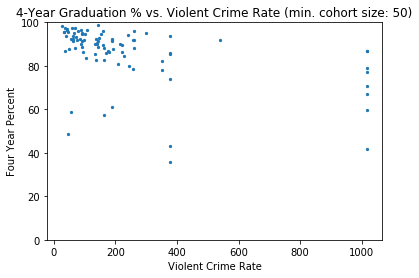

In [132]:
school_crime.plot(x= 'Violent Crime Rate',
                 y= 'Four Year Percent',
                 kind='scatter',
                 title=f'4-Year Graduation % vs. Violent Crime Rate (min. cohort size: {min_cohort})',
                 marker='.',
                 ylim=(0,100))

### Minneapolis crime data by neighborhood

In [ ]:
# Begin working with data for minneapolis crime by neighborhood
mpls_crime.head()

In [ ]:
# Create table showing avg number crimes reported by type for each
    # neighborhood over last few years
mpls_crime_avg = mpls_crime.pivot_table(values='number',
                                         index='neighborhood',
                                         columns='ucrDescription')
mpls_crime_avg

In [ ]:
# Create multi-index series -- Neighborhood --> Type of Crime --> Year Reported --> Avg. Number Reported
mpls_crime_year_groups = mpls_crime.groupby(['neighborhood', 'ucrDescription', 'reportYear'])['number'].mean()

# Display as a Dataframe
mpls_neighborhoods = mpls_crime_year_groups.unstack()
mpls_neighborhoods